Setup

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
%matplotlib inline

In [97]:
df = pd.read_csv("qudditch_training.csv")
df.drop(["id","player_id","weight","foul_type_id","game_move_id","penalty_id","player_code","move_speciality","snitchnip",
         "checking","dopplebeater_defence","hawkshead_attacking_formation","no_hands_tackle","power_play","spiral_dive",
         "starfish_and_stick","twirl","wronski_feint","zig-zag","bludger_backbeat","chelmondiston_charge",
         "dionysus_dive","double_eight_loop","finbourgh_flick","parkins_pincer","plumpton_pass","porskoff_ploy",
         "transylvanian_tackle","woollongong_shimmy"],axis=1,inplace=True)
df = (df[~pd.isnull(df).any(axis=1)])

In [110]:
print(df.columns)
data = df.values
X1 = data[0:101267] # This leaves 101265 entries.

Y = data[:,-1]

#Y1 = Y1=='YES'
for i in range(len(Y)):
    if Y[i]=="NO":
        Y[i]=0
    elif Y[i]=="YES":
        Y[i]=1

Y = Y.reshape((Y.shape[0],1))

gryffindor = np.zeros((X1.shape[0],1))
hufflepuff = np.zeros((X1.shape[0],1))
ravenclaw = np.zeros((X1.shape[0],1))
slytherin = np.zeros((X1.shape[0],1))

female = np.zeros((X1.shape[0],1))
male = np.zeros((X1.shape[0],1))

beater = np.zeros((X1.shape[0],1))
chaser = np.zeros((X1.shape[0],1))
seeker = np.zeros((X1.shape[0],1))

print(X1[0])

for row in range(len(X1)):
    if X1[row][0]=="Gryffindor":
        gryffindor[row]=1
    elif X1[row][0]=="Hufflepuff":
        hufflepuff[row]=1
    elif X1[row][0]=="Ravenclaw":
        ravenclaw[row]=1
    elif X1[row][0]=="Slytherin":
        slytherin[row]=1
        
    if X1[row][1]=="Female":
        female[row]=1
    elif X1[row][1]=="Male":
        male[row]=1
        
#    if X1[row][7]=="?":
#        X1[row][7]=0;
#    else:
#        X1[row][7]=float(X1[row][7])

    if X1[row][10]=="Beater":
        beater[row]=1
    elif X1[row][10]=="Chaser":
        chaser[row]=1
    elif X1[row][10]=="Seeker":
        seeker[row]=1
        
    if X1[row][12]=="Norm":
        X1[row][12]=1
    elif X1[row][12]==">7":
        X1[row][12]=2
    elif X1[row][12]==">8":
        X1[row][12]=3
    elif X1[row][12]=="None":
        X1[row][12]=0
    
    if X1[row][13]=="No":
        X1[row][13]=0
    elif X1[row][13]=="Down":
        X1[row][13]=1
    elif X1[row][13]=="Steady":
        X1[row][13]=2
    elif X1[row][13]=="Up":
        X1[row][13]=3
        
    if X1[row][14]=="No":
        X1[row][14]=0
    elif X1[row][14]=="Down":
        X1[row][14]=1
    elif X1[row][14]=="Steady":
        X1[row][14]=2
    elif X1[row][14]=="Up":
        X1[row][14]=3
        
    if X1[row][15]=="No":
        X1[row][15]=0
    elif X1[row][15]=="Down":
        X1[row][15]=1
    elif X1[row][15]=="Steady":
        X1[row][15]=2
    elif X1[row][15]=="Up":
        X1[row][15]=3
        
    if X1[row][-2]=="No":
        X1[row][-2]=0
    elif X1[row][-2]=="Yes":
        X1[row][-2]=1

    if X1[row][-3]=="No":
        X1[row][-3]=0
    elif X1[row][-3]=="Ch":
        X1[row][-3]=1
        
print(df.columns[18])
#X1[:,-2] = X1[:,-2]=="Yes"
#X1[:,-3] = X1[:,-3]=="Ch"

print(X1[0])

X1 = np.hstack((X1,gryffindor,hufflepuff,ravenclaw,slytherin,female,male,beater,chaser,seeker))
#X1: [
#0'house', 
#1'gender', 
#2'age', 
#3'game_duration', 
#4'num_game_moves',
#5'num_game_losses',
#6'num_practice_sessions',
#7'num_games_satout',
#8'num_games_injured',
#9'num_games_notpartof',
#10'player_type',
#11'num_games_won',
#12'stooging',
#13'body_blow',
#14'sloth_grip_roll',
#15'reverse_pass',
#16'change',
#17'snitch_caught',
#    'quidditch_league_player'?
#18'gryffindor',
#19'hufflepuff',
#20'ravenclaw',
#21'slytherin',
#22'female',
#23'male',
#24'beater',
#25'chaser',
#26'seeker']
X = np.delete(X1,[0,1,10,18],1)

#X:  ['age', 'game_duration', 'num_game_moves',
#       'num_game_losses', 'num_practice_sessions', 'num_games_satout',
#       'num_games_injured', 'num_games_notpartof',
#       'num_games_won', 'stooging', 'body_blow', 'sloth_grip_roll',
#       'reverse_pass', 'change', 'snitch_caught',
#       'gryffindor','hufflepuff','ravenclaw','slytherin','female','male',
#       'beater','chaser','seeker']

print(len(X[0]))


#print(X[0:20,-6:-2])

#print(X[0:20,-2:])

Index(['house', 'gender', 'age', 'game_duration', 'num_game_moves',
       'num_game_losses', 'num_practice_sessions', 'num_games_satout',
       'num_games_injured', 'num_games_notpartof', 'player_type',
       'num_games_won', 'stooging', 'body_blow', 'sloth_grip_roll',
       'reverse_pass', 'change', 'snitch_caught', 'quidditch_league_player'],
      dtype='object')
['Gryffindor' 'Female' 11.0 1.0 41.0 0.0 1.0 0.0 0.0 0.0 'Beater' 1.0
 'None' 'No' 'No' 'No' 'No' 'No' 0]
quidditch_league_player
['Gryffindor' 'Female' 11.0 1.0 41.0 0.0 1.0 0.0 0.0 0.0 'Beater' 1.0 0 0 0
 0 0 0 0]
24


In [111]:
X_scale = preprocessing.scale(X)
Xp=preprocessing.PolynomialFeatures(degree=2)
X_fit = Xp.fit_transform(X_scale)

trainX,testX,trainY,testY=train_test_split(X_fit,Y,test_size=0.5)

C:\Users\Rafi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
# Unsupervised Analysis
# Plot every x parameter with y

# We gotta change this so that every pair of features are plotted in subplots.

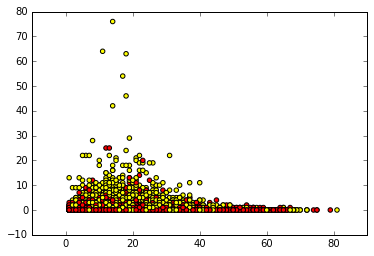

In [116]:
# Plot every pair of x parameters with y

# We gotta change this so that every pair of features are plotted in subplots.

#for i in range(24):
#    for j in range(24):
#        if i!=j:
#            plt.scatter(X[:,i],X[:,j],c=Y,cmap='autumn')

Logistic Regression

In [ ]:
# Variations:
# Regularization (use L1 and L2)
# Polynomial transformation
# c values

#this is from the slides for logisitic regression
clf = LogisticRegression(solver='lbfgs',multi_class='multinomial')
clf.fit(trainX, trainY)
yhat_test = clf.predict(testX)
score = clf.score(testX, testY)

#helpful link for log reg: https://towardsdatascience.com/logistic-regression-a-simplified-approach-using-python-c4bc81a87c31\n",

#train test split:\n",
#preprocessing to scale the data and use train_test_split to split the data (70% train and 30% test)\n",

x_train, x_test, y_train, y_test = train_test_split(x_scale, Y)
print(x_train.shape)
print(y_train.shape)

#this trains and predicts\n",
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

#check precision, recall, f1-score using classification report\n",
print(classification_report(y_test,predictions))

#another option found in hw5
#log reg with lasso(l1) regularization
# Initialize an empty list to store values of training set accuracy.
acc_train_logreg = []
# Initialize an empty list to store values of test set accuracy.
acc_test_logreg = []
# Initialize an empty list to store different values of parameter 'c'.
c_logreg = []
# Complete the function logreg that accepts 'c' as a parameter, which is used to create logreg model 
# with different values of C.
def logreg_model(c , X_train, Y_train, X_test, Y_test,reg=None):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of penalty as 'L1'. By default, it is 'L2'.
    # Pass the value of C = c. Note that C is the inverse of lambda. So, small value of C i.e. b/w 0 and 1 \n",
    # means stronger regularization and large value means less regularization.\n",
    # Also, in sklearn, L1 is only supported with solver = 'saga'. Solver is the type of optimization algorithm like GDA or\n",
    # SGDA, which is to be used. So, 'saga' is another algorithm like that. Pass the value of solver as 'saga
    #Create the Logistic Regression model object as described above and save it to logreg\n",
    
    if reg=="LASSO" or reg=="Lasso" or reg=="lasso" or reg=="l2" or reg==None:
        logreg = linear_model.LogisticRegression(C=c,penalty='l2', warm_start=True, solver='saga')
    elif reg=="Ridge" or reg=="ridge" or reg=="l1":
        logreg = linear_model.LogisticRegression(C=c,penalty='l1', warm_start=True, solver='saga')
    
    #Fit the model on the training set\n",
    logreg.fit(X_train, Y_train)
    
    #Find the prediction on training set\n",
    Yhat_train = logreg.predict(X_train)
    
    # Adding training accuracy to acc_train_logreg\n",
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg.append(acc_train)
    print(\"Accuracy on training data = %f\" % acc_train)
    
    #Find the prediction on test set\n",
    Yhat_test = logreg.predict(X_test)
    
    # Adding testing accuracy to acc_test_logreg\n",
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg.append(acc_test)
    print(\"Accuracy on test data = %f\" % acc_test)
    # Appending value of c for graphing purposes\n",
    c_logreg.append(c)

In [ ]:
c = 10000
logreg_model(c,x_train,y_train,x_test,x_train,'LASSO')

logreg_model(c,x_train,y_train,x_test,x_train,'Ridge')

#Use different feature pairs
c = 10000
logreg_model(c,x_train,y_train,x_test,x_train,'LASSO')

clist = [1000,10000,100000]
for c in clist:
    logreg_model(c,x_train,y_train,x_test,x_train,'LASSO')

Support Vector Machines

In [ ]:
# Variations
# c value
# kernel
# polynomial transformation

Neural Networks

In [ ]:
# Variations:
# hidden layers (use 1,2 and 3)
# hidden layer nodes (use 10,20 and 5)
# activation function (use sigmoid, ReLU, tanh)

def f(z):
    return 1 / (1 + np.exp(-z))


def f_deriv(z):
    return f(z) * (1 - f(z))

def f2(z):
    if z>0:
        return z
    else:
        return 0
    
def f2_deriv(z):
    if z>0:
        return 1
    else:
        return 0
    
def f3(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

def f3_deriv(z):
    return 1-(f3(z))^2

In [ ]:
def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

def feed_forward(x, W, b, act_func=1):
    a = {1: x}
    z = {}
    for l in range(1, len(W) + 1):
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]
        if act_func==1:
            a[l+1] = f(z[l+1])
        elif act_func == 2:
            a[l+1] = f2(z[l+1])
        elif act_func == 3:
            a[l+1] = f3(z[l+1])
        
    return a, z

def calculate_out_layer_delta(y, a_out, z_out, W, lmda, act_func=1):
    if act_func==1:
        return -(y-a_out) * f_deriv(z_out) + (lmda/2) * W
    elif act_func==2:
        return -(y-a_out) * f2_deriv(z_out) + (lmda/2) * W
    elif act_func==3:
        return -(y-a_out) * f3_deriv(z_out) + (lmda/2) * W


def calculate_hidden_delta(delta_plus_1, w_l, z_l, act_func=1):
    if act_func==1:
        return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)
    elif act_func==2:
        return np.dot(np.transpose(w_l), delta_plus_1) * f2_deriv(z_l)
    elif act_func==3:
        return np.dot(np.transpose(w_l), delta_plus_1) * f3_deriv(z_l)

def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25, act_func=1):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            a, z = feed_forward(X[i, :], W, b,act_func)
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l], W[l], lmbda.act_func)
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l],act_func)
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))
                    tri_b[l] += delta[l+1]
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

In [ ]:
nn_structure1 = [27, 10, 1]
nn_structure2 = [27, 20, 1]
nn_structure3 = [27, 5, 1]

nn_structure4 = [27, 10, 10, 1]
nn_structure5 = [27, 10, 10, 10, 1]

In [ ]:
W_1, b_1, avg_cost_func_1 = train_nn(nn_structure1, X_train, y_v_train, 3000,act_func=1)

In [ ]:
W_2, b_2, avg_cost_func_2 = train_nn(nn_structure1, X_train, y_v_train, 3000,act_func=2)

In [ ]:
W_3, b_3, avg_cost_func_3 = train_nn(nn_structure1, X_train, y_v_train, 3000,act_func=3)

In [ ]:
W_4, b_4, avg_cost_func_4 = train_nn(nn_structure2, X_train, y_v_train, 3000,act_func=1)

In [ ]:
W_5, b_5, avg_cost_func_5 = train_nn(nn_structure3, X_train, y_v_train, 3000,act_func=1)

In [ ]:
W_6, b_6, avg_cost_func_6 = train_nn(nn_structure4, X_train, y_v_train, 3000,act_func=1)

In [ ]:
W_7, b_7, avg_cost_func_7 = train_nn(nn_structure5, X_train, y_v_train, 3000,act_func=1)